# Dataset Information

“Shopshop” adalah perusahaan e-commerce nasional yang menjual berbagai kebutuhan sehari-hari melalui aplikasi dan website. Saat ini, Shopshop memiliki ribuan pelanggan aktif dengan karakteristik yang beragam, mulai dari usia, lokasi, perangkat yang digunakan, metode pembayaran, hingga pola belanja.


Permasalahan utama :
Persaingan di industri e-commerce sangat ketat. Saat ini, permasalahan utama Shopshop terletak pada **meningkatnya tingkat churn pelanggan, terutama di segmen tertentu**. Kondisi ini menimbulkan tantangan bagi perusahaan karena biaya akuisisi pelanggan baru lebih tinggi dibandingkan mempertahankan pelanggan lama. Oleh karena itu, penting bagi Shopshop untuk **memahami faktor-faktor yang mendorong churn agar dapat merumuskan strategi retensi yang lebih efektif dan meningkatkan loyalitas pelanggan.**

Dataset ini memiliki **20 kolom** yang berisi:


1. CustomerID → ID unik pelanggan
2. Churn → Status churn (berhenti menggunakan layanan)
3. Tenure → Lama waktu pelanggan bergabung di organisasi
4. PreferredLoginDevice → Perangkat login yang disukai pelanggan
5. CityTier → Tingkatan kota
6. WarehouseToHome → Jarak antara gudang ke rumah pelanggan
7. PreferredPaymentMode → Metode pembayaran yang disukai pelanggan
8. Gender → Jenis kelamin pelanggan
9. HourSpendOnApp → Jumlah jam yang dihabiskan di aplikasi atau website
10. NumberOfDeviceRegistered → Jumlah perangkat yang terdaftar pada pelanggan
11. PreferedOrderCat → Kategori pesanan yang disukai pelanggan dalam 1 bulan terakhir
12. SatisfactionScore → Skor kepuasan pelanggan terhadap layanan
13. MaritalStatus → Status pernikahan pelanggan
14. NumberOfAddress → Jumlah alamat yang ditambahkan oleh pelanggan
15. Complain → Apakah ada keluhan yang diajukan dalam 1 bulan terakhir
16. OrderAmountHikeFromlastYear → Persentase kenaikan jumlah pesanan dari tahun lalu
17. CouponUsed → Jumlah kupon yang digunakan dalam 1 bulan terakhir
18. OrderCount → Jumlah pesanan yang dilakukan dalam 1 bulan terakhir
19. DaySinceLastOrder → Jumlah hari sejak pesanan terakhir oleh pelanggan
20. CashbackAmount → Rata-rata cashback dalam 1 bulan terakhir



## Data Understanding

In [58]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


link = 'https://github.com/vidaaashafy/PortofolioBuilding/raw/main/E%20Commerce%20Dataset.xlsx'

df_churn_data = pd.read_excel(link, sheet_name='E Comm', engine='openpyxl')
df_churn_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [59]:
#informasi general
df_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [60]:
#cek duplikat data
print(f"data duplikat: {df_churn_data.duplicated().sum()}")

data duplikat: 0


Hasil di atas menunjukkan bahwa tidak terdapat data yang terduplikat di dalam dataset

In [61]:
#cek missing value
missing_value = df_churn_data.isnull().sum()

#cek empty string
empty_string = (df_churn_data == '').sum()

#combine result
data_cleaning = pd.DataFrame({
    'Missing Value': missing_value,
    'Empty String': empty_string
})

print("Missing Value & Empty String Check")
print(data_cleaning)

Missing Value & Empty String Check
                             Missing Value  Empty String
CustomerID                               0             0
Churn                                    0             0
Tenure                                 264             0
PreferredLoginDevice                     0             0
CityTier                                 0             0
WarehouseToHome                        251             0
PreferredPaymentMode                     0             0
Gender                                   0             0
HourSpendOnApp                         255             0
NumberOfDeviceRegistered                 0             0
PreferedOrderCat                         0             0
SatisfactionScore                        0             0
MaritalStatus                            0             0
NumberOfAddress                          0             0
Complain                                 0             0
OrderAmountHikeFromlastYear            265           

Hasil di atas menunjukkan bahwa terdapat 8 kolom yang memiliki missing value, oleh karena itu, handling missing value perlu dilakukan

## Data Cleaning (Handling Missing Value)

Mencari tahu apakah kolom-kolom kosong memiliki hubungan satu sama lain

Jumlah kolom:
Tenure                         264
WarehouseToHome                251
HourSpendOnApp                 255
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
dtype: int64

Persentase:
Tenure                         4.69
WarehouseToHome                4.46
HourSpendOnApp                 4.53
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
dtype: float64


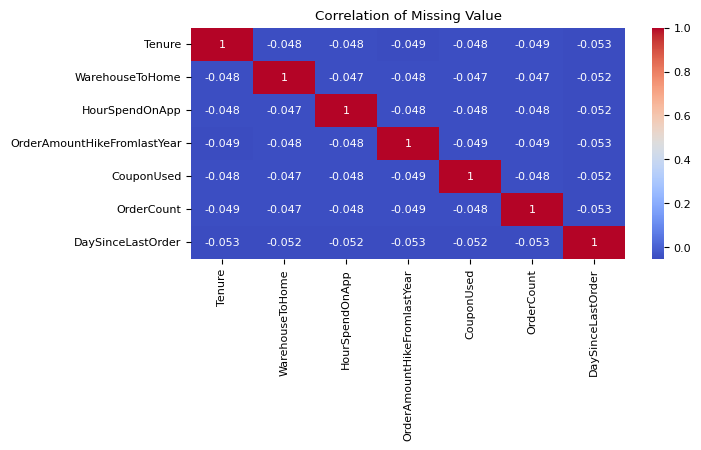

In [62]:
# daftar kolom dengan missing value
cols_with_missing = [
    "Tenure",
    "WarehouseToHome",
    "HourSpendOnApp",
    "OrderAmountHikeFromlastYear",
    "CouponUsed",
    "OrderCount",
    "DaySinceLastOrder"
]

# jumlah & persentase missing
print("Jumlah kolom:")
print(df_churn_data[cols_with_missing].isnull().sum())
print("\nPersentase:")
print((df_churn_data[cols_with_missing].isnull().mean() * 100).round(2))

# korelasi antar missing value
missing_corr = df_churn_data[cols_with_missing].isnull().corr()
plt.figure(figsize=(7,3))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Missing Value")
plt.show()



Hasil heatmap di atas menunjukkan bahwa **semua korelasi antar missing value bernilai negatif kecil, sangat dekat dengan 0, dan berwarna biru gelap**. Oleh karena itu, dapat disimpulkan bahwa **terdapat hubungan terbalik yang lemah, dan tidak terdapat pola keterkaitan yang jelas antar kolom yang kosong**. Maka, masing-masing kolom dapat di-handle sendiri-sendiri.

Mengisi kolom yang memiliki missing value

In [63]:
#Tenure -> diisi dengan 0 karena kemungkinan pelanggan baru
df_churn_data['Tenure'] = df_churn_data['Tenure'].fillna(0)

#Warehouse To Home -> diisi dengan median karena jarak tidak mungkin 0
df_churn_data['WarehouseToHome'] = df_churn_data['WarehouseToHome'].fillna(df_churn_data['WarehouseToHome'].median())

#Hour Spend On App -> diisi dengan median karena kemungkinan error sehingga tidak tercatat
df_churn_data['HourSpendOnApp'] = df_churn_data['HourSpendOnApp'].fillna(df_churn_data['HourSpendOnApp'].median())

#Order Amount Hike From Last Year -> diisi dengan 0 karena bisa jadi tidak order di kedua tahun / pelanggan baru
df_churn_data['OrderAmountHikeFromlastYear'] = df_churn_data['OrderAmountHikeFromlastYear'].fillna(0)

#Coupon Used -> diisi dengan 0 karena kemungkinan belum pernah memakai kupon sama sekali
df_churn_data['CouponUsed'] = df_churn_data['CouponUsed'].fillna(0)

#Order Count -> diisi dengan 0 karena kemungkinan belum pernah order sama sekali
df_churn_data['OrderCount'] = df_churn_data['OrderCount'].fillna(0)

#Day Since Last Order -> diisi dengan 0 karena kemungkinan tidak pernah order (jadi tidak ada last order).
df_churn_data['DaySinceLastOrder'] = df_churn_data['DaySinceLastOrder'].fillna(0)

print(df_churn_data.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


Hasil di atas menunjukkan bahwa semua kolom sudah terisi dan sudah tidak ada kolom yang memiliki missing value

#Descriptive Statistics

In [64]:
df_churn_data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,9.712078,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,14.968561,1.671403,2.870160,4.295737,177.223030
std,1625.385339,0.374240,8.627486,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,4.893091,1.886648,2.939615,3.700134,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51408.250000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,1.000000,145.770000
50%,52815.500000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [65]:
df_churn_data.describe(include='object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


#Check Outlier

In [66]:
#cek outlier dengan IQR
outlier_columns = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CouponUsed',
    'CashbackAmount'
]

outlier_summary = {}

for col in outlier_columns:
    Q1 = df_churn_data[col].quantile(0.25)
    Q3 = df_churn_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_churn_data[(df_churn_data[col] < lower_bound) | (df_churn_data[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

#ubah ke DataFrame
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print(outlier_df)


                             Outlier Count
Tenure                                   4
WarehouseToHome                          2
HourSpendOnApp                           6
OrderAmountHikeFromlastYear            298
CouponUsed                             629
OrderCount                             703
DaySinceLastOrder                       30
CashbackAmount                         438


In [67]:
from scipy.stats import zscore
#cek outlier dengan z-score
outlier_columns = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CouponUsed',
    'CashbackAmount'
]

for col in outlier_columns:
    df_churn_data[f"Z_{col}"] = zscore(df_churn_data[col].dropna())

#bagi outlier atas dan bawah
def cek_outlier(z):
    if z < -3:
        return "Outlier Bawah"
    elif z > 3:
        return "Outlier Atas"
    else:
        return "Normal"

#apply outlier ke setiap kolom
for col in outlier_columns:
    df_churn_data[f"Outlier_{col}"] = df_churn_data[f"Z_{col}"].apply(cek_outlier)

#hasil
for col in outlier_columns:
    print(f"\n{col}")
    print(df_churn_data[f"Outlier_{col}"].value_counts())


Tenure
Outlier_Tenure
Normal          5626
Outlier Atas       4
Name: count, dtype: int64

WarehouseToHome
Outlier_WarehouseToHome
Normal          5628
Outlier Atas       2
Name: count, dtype: int64

HourSpendOnApp
Outlier_HourSpendOnApp
Normal           5627
Outlier Bawah       3
Name: count, dtype: int64

OrderAmountHikeFromlastYear
Outlier_OrderAmountHikeFromlastYear
Normal           5365
Outlier Bawah     265
Name: count, dtype: int64

CouponUsed
Outlier_CouponUsed
Normal          5524
Outlier Atas     106
Name: count, dtype: int64

OrderCount
Outlier_OrderCount
Normal          5454
Outlier Atas     176
Name: count, dtype: int64

DaySinceLastOrder
Outlier_DaySinceLastOrder
Normal          5587
Outlier Atas      43
Name: count, dtype: int64

CouponUsed
Outlier_CouponUsed
Normal          5524
Outlier Atas     106
Name: count, dtype: int64

CashbackAmount
Outlier_CashbackAmount
Normal           5619
Outlier Bawah       9
Outlier Atas        2
Name: count, dtype: int64


Hasil outlier di atas menunjunjukkan bahwa **data numerikal dalam dataset ini memiliki banyak outlier**, hal ini dikarenakan adanya **perbedaan perilaku pelanggan atau tidak semua pelanggan memiliki pola belanja yang sama**. Oleh karena itu, **analisis selanjutnya akan didasarkan pada CustomerID** sebagai kode unik yang merepresentasikan masing-masing pelanggan.

#Exploratory Data Analysis

##Proporsi Churn by Segment

In [86]:
# Kode Churn Summary
def churn_summary(df, col_name):
    summary = (
        df.pivot_table(
            index=[col_name],
            columns='Churn',
            values='CustomerID',
            aggfunc='nunique',
            fill_value=0
        )
        .reset_index()
    )

    # rename kolom churn
    summary = summary.rename(columns={0: 'NonChurn', 1: 'Churn'})

    # total per kategori
    summary['TotalCustomer'] = summary['Churn'] + summary['NonChurn']

    # churn rate per kategori
    summary['ChurnRate(%)'] = (summary['Churn'] / summary['TotalCustomer'] * 100).round(2)

    # total untuk proporsi
    total_all = summary['TotalCustomer'].sum()
    total_churn_all = summary['Churn'].sum()

    # proporsi
    summary['CustomerProportion(%)'] = (summary['TotalCustomer'] / total_all * 100).round(2)
    summary['ChurnProportion(%)'] = (summary['Churn'] / total_churn_all * 100).round(2)

    # urutkan
    summary = summary[[col_name,'TotalCustomer','Churn','NonChurn','ChurnRate(%)','CustomerProportion(%)','ChurnProportion(%)']]
    summary = summary.sort_values(by='ChurnProportion(%)', ascending=False).reset_index(drop=True)

    # Pie Chart untuk proporsi churn
    plt.figure(figsize=(5,5))
    plt.pie(
        summary['Churn'],
        labels=summary[col_name],
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ff6666','#ffccff','#b3d9ff','#ffd480','#d5f4e6']
    )
    plt.title(f"Churn Proportion based on{col_name}", fontsize=14)
    plt.show()

    return summary

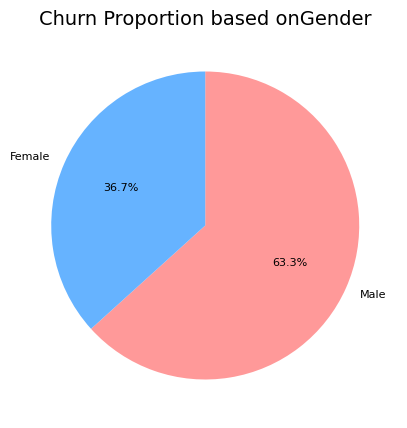

Churn,Gender,TotalCustomer,Churn,NonChurn,ChurnRate(%),CustomerProportion(%),ChurnProportion(%)
0,Male,3384,600,2784,17.73,60.11,63.29
1,Female,2246,348,1898,15.49,39.89,36.71


In [87]:
# Gender
churn_summary(df_churn_data, 'Gender')

Hasil di atas menunjukkan bahwa jenis kelamin yang memiliki churn rate dan proporsi churn tinggi adalah laki-laki

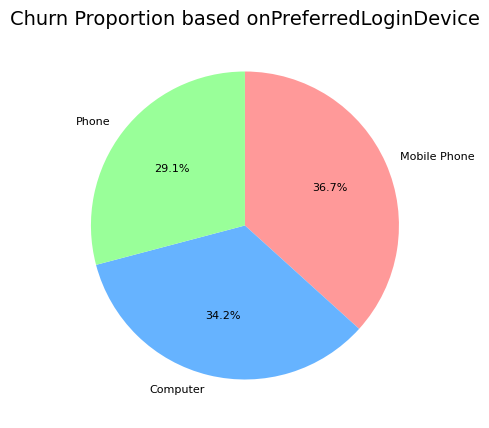

Churn,PreferredLoginDevice,TotalCustomer,Churn,NonChurn,ChurnRate(%),ProporsiCustomer(%),ProporsiChurn(%)
0,Mobile Phone,2765,348,2417,12.59,49.11,36.71
1,Computer,1634,324,1310,19.83,29.02,34.18
2,Phone,1231,276,955,22.42,21.87,29.11


In [70]:
# Login Device
churn_summary(df_churn_data, 'PreferredLoginDevice')

Hasil diatas menunjukkan bahwa mayoritas pelanggan churn adalah yang menggunakan Phone/Mobile Phone dengan churn rate dan proporsi churn tertinggi

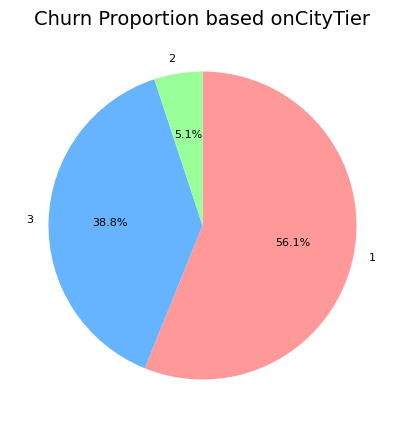

Churn,CityTier,TotalCustomer,Churn,NonChurn,ChurnRate(%),ProporsiCustomer(%),ProporsiChurn(%)
0,1,3666,532,3134,14.51,65.12,56.12
1,3,1722,368,1354,21.37,30.59,38.82
2,2,242,48,194,19.83,4.30,5.06


In [71]:
# CityTier
churn_summary(df_churn_data, 'CityTier')

Hasil diatas menunjukkan bahwa proporsi churn terbesar adalah kota tier 1 atau metropolitan besar

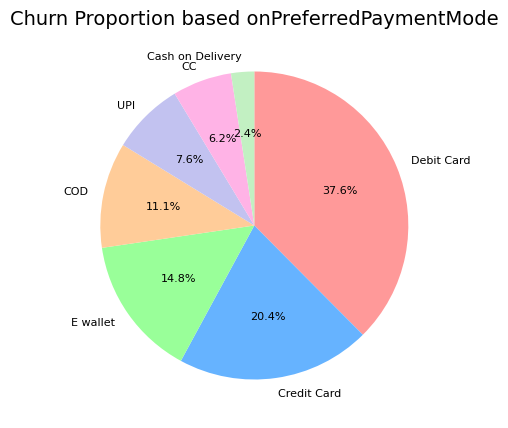

Churn,PreferredPaymentMode,TotalCustomer,Churn,NonChurn,ChurnRate(%),ProporsiCustomer(%),ProporsiChurn(%)
0,Debit Card,2314,356,1958,15.38,41.10,37.55
1,Credit Card,1501,193,1308,12.86,26.66,20.36
2,E wallet,614,140,474,22.80,10.91,14.77
3,COD,365,105,260,28.77,6.48,11.08
4,UPI,414,72,342,17.39,7.35,7.59
5,CC,273,59,214,21.61,4.85,6.22
6,Cash on Delivery,149,23,126,15.44,2.65,2.43


In [72]:
# Payment Mode
churn_summary(df_churn_data, 'PreferredPaymentMode')

Hasil di atas menunjukkan bahwa payment method yang menghasilkan churn terbesar adalah dengan menggunakan Debit Card

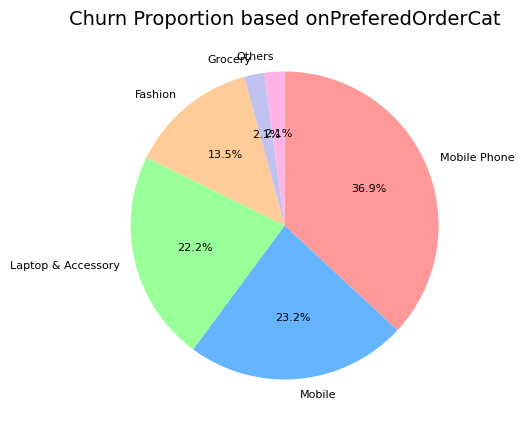

Churn,PreferedOrderCat,TotalCustomer,Churn,NonChurn,ChurnRate(%),ProporsiCustomer(%),ProporsiChurn(%)
0,Mobile Phone,1271,350,921,27.54,22.58,36.92
1,Mobile,809,220,589,27.19,14.37,23.21
2,Laptop & Accessory,2050,210,1840,10.24,36.41,22.15
3,Fashion,826,128,698,15.50,14.67,13.50
4,Grocery,410,20,390,4.88,7.28,2.11
5,Others,264,20,244,7.58,4.69,2.11


In [73]:
# Order Category
churn_summary(df_churn_data, 'PreferedOrderCat')

Hasil di atas menunjukkan bahwa kategori barang dengan proporsi churn terbesar adalah Phone / Mobile Phone

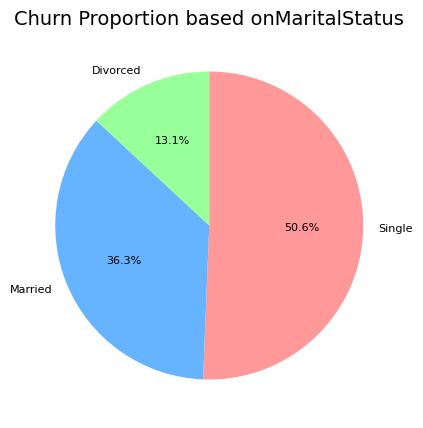

Churn,MaritalStatus,TotalCustomer,Churn,NonChurn,ChurnRate(%),ProporsiCustomer(%),ProporsiChurn(%)
0,Single,1796,480,1316,26.73,31.90,50.63
1,Married,2986,344,2642,11.52,53.04,36.29
2,Divorced,848,124,724,14.62,15.06,13.08


In [74]:
# Marital Status
churn_summary(df_churn_data, 'MaritalStatus')

Hasil di atas menunjukkan bahwa proporsi churn terbesar adalah individu yang berstatus single

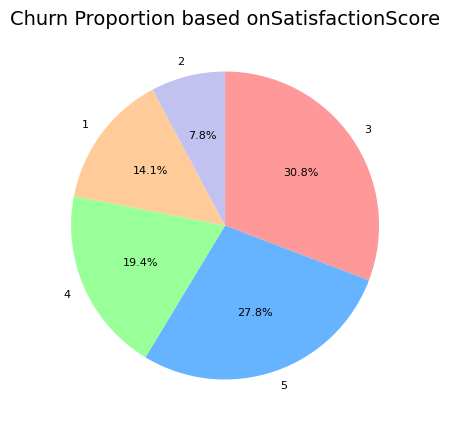

Churn,SatisfactionScore,TotalCustomer,Churn,NonChurn,ChurnRate(%),ProporsiCustomer(%),ProporsiChurn(%)
0,3,1698,292,1406,17.20,30.16,30.80
1,5,1108,264,844,23.83,19.68,27.85
2,4,1074,184,890,17.13,19.08,19.41
3,1,1164,134,1030,11.51,20.67,14.14
4,2,586,74,512,12.63,10.41,7.81


In [75]:
# Satisfaction Score
churn_summary(df_churn_data, 'SatisfactionScore')

Hasil di atas menunjukkan bahwa proporsi churn terbesar adalah individu dengan tingkat kepuasan 5 atau 'Sangat Puas'

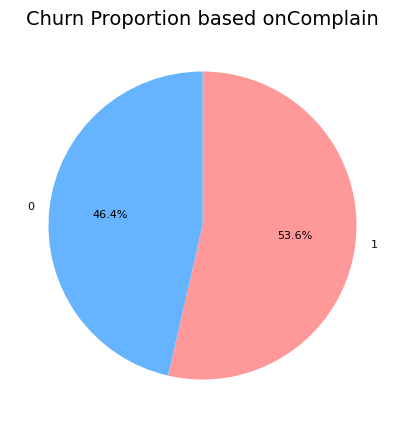

Churn,Complain,TotalCustomer,Churn,NonChurn,ChurnRate(%),ProporsiCustomer(%),ProporsiChurn(%)
0,1,1604,508,1096,31.67,28.49,53.59
1,0,4026,440,3586,10.93,71.51,46.41


In [76]:
# Complain
churn_summary(df_churn_data, 'Complain')

Hasil di atas menunjukkan bahwa churn terbesar hadir dari pelanggan yang pernah mengajukan complain

## Proporsi Churn by Numerical Value

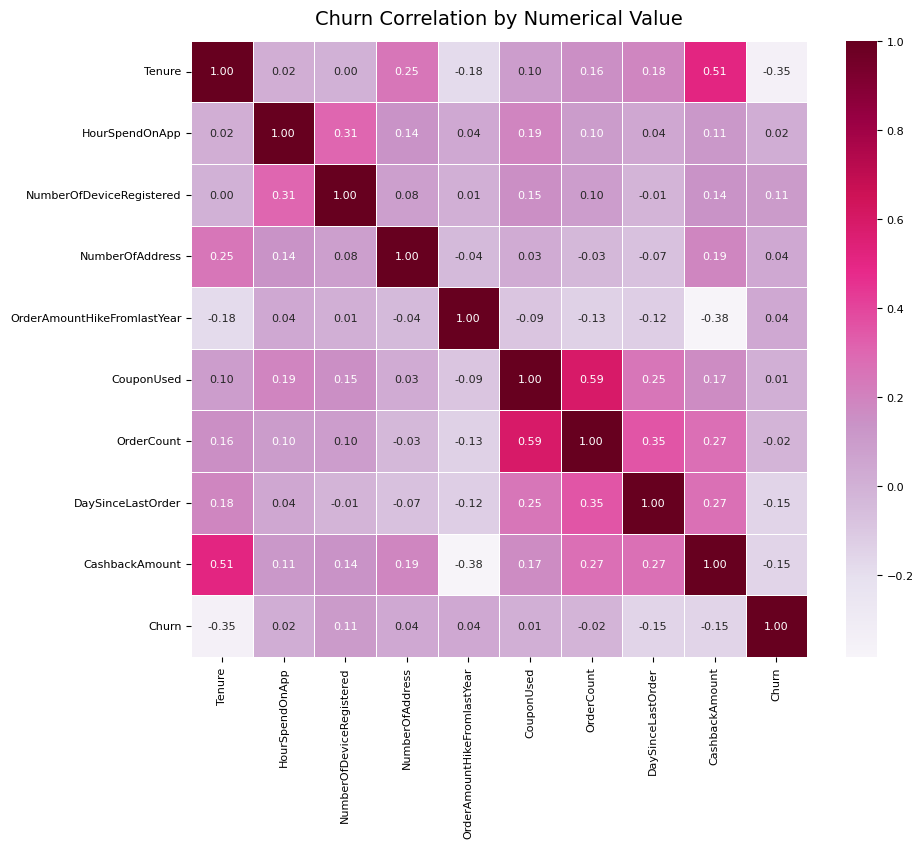

In [88]:
# kolom numerikal + churn
num_cols = [
    'Tenure',
    'HourSpendOnApp',
    'NumberOfDeviceRegistered',
    'NumberOfAddress',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount',
    'Churn'
]

# hitung korelasi
corr = df_churn_data[num_cols].corr()

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="PuRd",
    cbar=True,
    square=True,
    linewidths=.5
)
plt.title("Churn Correlation by Numerical Value", fontsize=14, pad=12)
plt.show()


Heatmap di atas menunjukkan bahwa **churn memiliki korelasi yang relatif sedang dengan tenure**. Sedangkan dengan variabel lainnya, churn relatif lemah dan hampir tidak ada.

Selain itu, korelasi yang cukup kuat dapat dilihat pada **Coupon Used dan Order Count (0.59)** yang menandakan bahwa Semakin banyak order, semakin banyak kupon yang dipakai.

Korelasi lain pada **Cashback Amount dan Tenure (0.51)** menandakan bahwa customer yang lebih lama berlangganan cenderung mendapat lebih banyak cashback

# Statistics Analysis

## Normality Testing

In [78]:
from scipy.stats import kstest
from scipy.stats import norm

num_cols = [
    'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
    'NumberOfAddress', 'OrderAmountHikeFromlastYear',
    'CouponUsed', 'OrderCount', 'DaySinceLastOrder',
    'CashbackAmount'
]

for col in num_cols:
    data = df_churn_data[col].dropna()

    # standardisasi data ke z-score
    standardized = (data - data.mean()) / data.std()

    # uji KS terhadap distribusi normal (mean=0, std=1)
    stat, p = kstest(standardized, 'norm')

    print(f"{col}: p-value={p:.4f}")
    if p > 0.05:
        print(" -> Data normal\n")
    else:
        print(" -> Data tidak normal\n")


Tenure: p-value=0.0000
 -> Data tidak normal

HourSpendOnApp: p-value=0.0000
 -> Data tidak normal

NumberOfDeviceRegistered: p-value=0.0000
 -> Data tidak normal

NumberOfAddress: p-value=0.0000
 -> Data tidak normal

OrderAmountHikeFromlastYear: p-value=0.0000
 -> Data tidak normal

CouponUsed: p-value=0.0000
 -> Data tidak normal

OrderCount: p-value=0.0000
 -> Data tidak normal

DaySinceLastOrder: p-value=0.0000
 -> Data tidak normal

CashbackAmount: p-value=0.0000
 -> Data tidak normal



Hasil uji normalitas di atas menunjukkan bahwa seluruh data numerikal tidak normal. Maka, uji statistik yang akan dilakukan akan disesuaikan

## Spearman Correlation

Berdasarkan heatmap, diketahui bahwa tenure menjadi salah satu faktor yang mempengaruhi churn.

Hipotesis awal : Terdapat hubungan antara tenure dan churn

In [79]:
from scipy.stats import spearmanr

rho, p_value = spearmanr(df_churn_data['Tenure'], df_churn_data['Churn'])

print("Spearman Correlation antara Tenure dan Churn:")
print(f"rho = {rho:.3f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    print("Terima H0 : Terdapat hubungan signifikan antara Tenure dan Churn ")
else:
    print("Tolak HO : Tidak terdapat hubungan signifikan antara Tenure dan Churn")

Spearman Correlation antara Tenure dan Churn:
rho = -0.396, p-value = 0.0000
Terima H0 : Terdapat hubungan signifikan antara Tenure dan Churn 


Hasil uji spearman rho -0.396 dan p-value 0.000 menunjukkan bahwa **terdapat hubungan negatif yang signifikan antara tenure dan churn**, menandakan bahwa **semakin lama pelanggan memiliki tenure (lama berlangganan), semakin kecil kemungkinan mereka churn**. Sebaliknya, pelanggan dengan tenure lebih pendek cenderung lebih mudah churn.

## Chi-square

Hipotesis awal : Tidak terdapat hubungan pada variabel kategorikal terhadap churn

In [80]:
from scipy.stats import chi2_contingency

# daftar variabel kategorikal
categorical_vars = [
    "Gender",
    "PreferredLoginDevice",
    "CityTier",
    "PreferredPaymentMode",
    "PreferedOrderCat",
    "MaritalStatus",
    "SatisfactionScore",
    "Complain",
    "CouponUsed"
]

# dictionary untuk simpan hasil
chi2_results = {}

for var in categorical_vars:
    # buat tabel kontingensi
    crosstab = pd.crosstab(df_churn_data[var], df_churn_data["Churn"])

    # uji chi-square
    chi2, p, dof, expected = chi2_contingency(crosstab)

    chi2_results[var] = {
        "Chi2": round(chi2, 4),
        "p-value": format(p, ".4f")
    }

# ubah ke dataframe biar rapi
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.reset_index().rename(columns={"index": "Variable"})

print("Hasil Uji Chi-Square (Categorical vs Churn):")
print(chi2_df)


Hasil Uji Chi-Square (Categorical vs Churn):
               Variable      Chi2 p-value
0                Gender    4.6629  0.0308
1  PreferredLoginDevice   73.5368  0.0000
2              CityTier   40.9824  0.0000
3  PreferredPaymentMode   77.8968  0.0000
4      PreferedOrderCat  288.6394  0.0000
5         MaritalStatus   188.671  0.0000
6     SatisfactionScore   69.8654  0.0000
7              Complain  350.9255  0.0000
8            CouponUsed   18.0959  0.3183


H0 : Tidak terdapat hubungan pada variabel kategorikal terhadap churn
H1 : Terdapat hubungan pada variabel kategorikal terhadap churn


Hasil uji chi-square di atas terhadap variabel kategorikal menunjukkan bahwa:
1. Gender (Chi = 4.662, p=0.0308) -> Terdapat hubungan churn berdasarkan gender, H1 diterima
2. Preferred Login Device (Chi = 73.536, p = 0.0000) -> Terdapat hubungan antara device yang digunakan terhadap churn, H1 diterima
3. City Tier (Chi = 40.982, p = 0.000) -> Terdapat hubungan antara kota tempat tinggal dengan churn, H1 diterima
4. Preferred Payment Mode (Chi = 77.869,p = 0.000) -> Terdapat hubungan antara metode pembayaran dengan churn, H1 diterima
5. Prefered Order Category (Chi 288.639, p = 0.000) -> Terdapat hubungan antara kategori barang yang dipesan dengan churn, H1 diterima
6. Marital Status (Chi = 188.671, p = 0.000) -> Terdapat hubungan antara status customer dengan churn, H1 diterima
7. Satisfaction Score (Chi = 69.865, p = 0.000) -> Terdapat hubungan antara kepuasan customer dengan churn, H1 diterima
8. Complain (Chi = 350.925, p = 0.000) -> Terdapat hubungan antara complain yang diajukan customer dengan churn, H1 diterima
9. Coupon Used (Chi = 18.095, p = 0.318) -> Tidak terdapat hubungan signifikan pada penggunakan kupon dengan churn


Berdasarkan hasil uji ini, maka **faktor yang paling berpengaruh terhadap churn adalah Complain, Order Category, dan Marital Status** karena memiliki nilai Chi yang tinggi. Sedangkan faktor yang tidak berpengaruh terhadap churn adalah Coupon Used.

# Summary and Recommendation

SUMMARY


Berdasarkan hasil analisis, faktor numerik yang berpengaruh signifikan terhadap churn adalah tenure, dengan hasil uji Spearman menunjukkan adanya hubungan negatif yang cukup kuat. Hal ini menunjukkan bahwa semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka melakukan churn, sementara pelanggan dengan masa berlangganan yang lebih pendek cenderung lebih mudah churn.

Pada variabel kategorikal, hampir semua faktor menunjukkan hubungan yang signifikan terhadap churn, kecuali Coupon Used yang tidak terbukti berpengaruh. Faktor dengan pengaruh paling besar terlihat pada Complain, Preferred Order Category, dan Marital Status, karena memiliki nilai Chi-square yang tinggi. Hasil ini mengindikasikan bahwa churn lebih banyak dipengaruhi oleh pengalaman dan interaksi pelanggan, seperti apakah mereka pernah melakukan komplain, kategori barang yang sering dipesan, serta status pernikahan mereka.

RECOMMENDATION

1. **Perkuat Complain Management**: Complain adalah faktor paling kuat yang memengaruhi churn, perusahaan perlu memastikan sistem penanganan keluhan lebih responsif. Perusahaan dapat menerapkan **customer support multichannel** (chat, email, call center, chatbot) dengan SLA (service level agreement) yang jelas. Perusahaan juga dapat membuat program **survei kepuasan pasca-pembelian** untuk mendeteksi masalah sebelum pelanggan benar-benar churn.
2. **Menerapkan cross-selling dan upselling serta loyalty pasca pembelian** : Produk kategori Phone memiliki nilai churn yang lebih tinggi karena merupakan produk high-value dan low-frequency. Maka, cross-selling dan up-selling dapat dilakukan dengan menawarkan aksesori pendukung lainnya, seperti casing, earphone, powerbank, juga smartwatch. Perusahaan juga dapat memberikan poin reward ekstra untuk pembelian handphone yang bisa ditukar di kategori lain untuk meningkatkan pembelian selanjutnya
3. **Fokus pada retensi pelanggan baru yang memiliki tenure rendah** : Perusahaan perlu memperhatikan pelanggan baru karena lebih rentan untuk churn. Hal ini dapat dilakukan dengan membuat program welcome journey seperti voucher belanja 3 bulan pertama, hadiah / membership program pada target pembelian tertentu, dan reminder untuk belanja.
4. **Kurangi Ketergantungan pada Kupon** : Coupon used tidak signifikan terhadap churn, maka, tidak perlu fokus pada pemberian kupon semata dan lebih baik arahkan pada peningkatan kualitas layanan dan personalisasi jenis barang daripada pemberian kupon.